## Preparation

##### Import Functions

In [1]:
from Scripts.LoadCSV import LoadCSV as LoadCSV
from Scripts.Fuzzify import Fuzzify as Fuzzify
from Scripts.OptimizeBruteForceKFold import OptimizeBruteForceKFold as OptimizeBruteForceKFold
from Scripts.ValueTest import ValueTest as ValueTest
from Scripts.OptimizeBruteForce import OptimizeBruteForce as OptimizeBruteForce
from Class.Helper import Helper as Helper
import warnings
warnings.simplefilter("ignore")

import Settings.GeneralSettings5 as generalSettings

# import Settings.SettingsBreastCancerData as settings
# import Settings.SettingsBreastCancerWisconsin as settings
# import Settings.SettingsDataBanknoteAuthentication as settings
# import Settings.SettingsHaberman as settings
# import Settings.SettingsHeart as settings
# import Settings.SettingsHTRU as settings
import Settings.SettingsImmunotherapy5 as settings
# import Settings.SettingsIndianLiverPatient as settings
# import Settings.SettingsPimaIndians as settings

##### Load CSV File

In [2]:
# if generalSettings.mode == 0:
loadCSV = LoadCSV()
samples_stats, train_stats, test_stats, train_samples = loadCSV.worker(settings)

##### Fuzzify Data

In [3]:
# if generalSettings.mode == 0:
fuzzify = Fuzzify()
changed_decisions, features_number_after_reduct, implicants_number, fuzzify_parameters = fuzzify.worker(settings, "", -1)

Feature 0:
	Mean: 0.4861111111111111
	Sigma: 0.4998070615401828
Feature 1:
	Mean: 0.3848238482384824
	Sigma: 0.27780091119218425
Feature 2:
	Mean: 0.5849116161616161
	Sigma: 0.26488062611478425
Feature 3:
	Mean: 0.28780864197530864
	Sigma: 0.23847336617011172
Feature 4:
	Mean: 0.3611111111111111
	Sigma: 0.41013397389537226
Feature 5:
	Mean: 0.11120432513049962
	Sigma: 0.16718830242180727
Feature 6:
	Mean: 0.15522875816993464
	Sigma: 0.22692278417229234


In [4]:
# if generalSettings.mode == 0:
#     helper = Helper()

#     fuzzification_data = [settings["dataset_name"], settings["gausses"], samples_stats, train_stats, test_stats, changed_decisions, round(changed_decisions / train_samples, 2), implicants_number, settings["feature_numbers"], features_number_after_reduct]
#     helper.saveFuzzificationStats(fuzzification_data)

#     fuzzification_parameters_data = [settings["dataset_name"], settings["gausses"], settings.sigma_mean_params] + fuzzify_parameters
#     helper.saveFuzzificationParameters(fuzzification_parameters_data)

## Train Set - K-Fold

##### Train Set | K-Fold - S Function Optymalization

In [5]:
if generalSettings.mode == 1:
    optimizeBruteForceKFold = OptimizeBruteForceKFold(settings, settings.s_function_width)

In [6]:
if generalSettings.mode == 1:
    best_s_function_center, mean_s_function_center = optimizeBruteForceKFold.worker(settings, settings.constraints, settings.s_function_width, settings.n_folds)

## Test Set | K-Fold Test

In [7]:
if generalSettings.mode == 1:
    valueTest = ValueTest(settings, settings.s_function_width, False)

##### K-Fold Test Set | S Function Value

In [8]:
if generalSettings.mode == 1:
    valueTest.sOptymalizationWorker(settings, best_s_function_center, "Test Value - K-Fold - Best Function Center")

In [9]:
if generalSettings.mode == 1:
    valueTest.sOptymalizationWorker(settings, mean_s_function_center, "Test Value - K-Fold - Average Function Center")

#### Functions

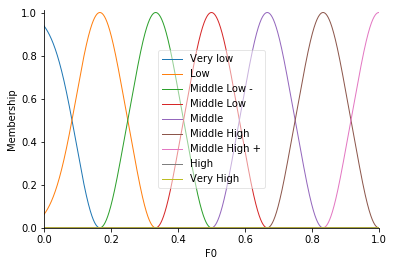

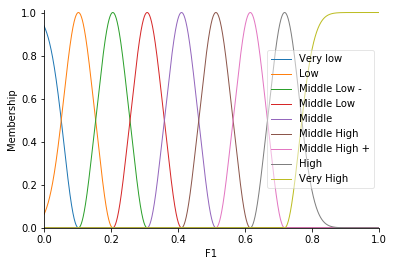

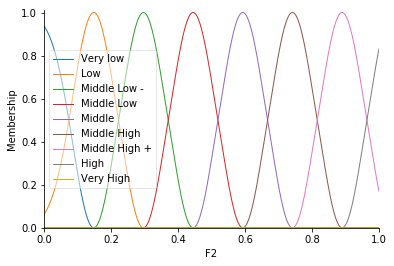

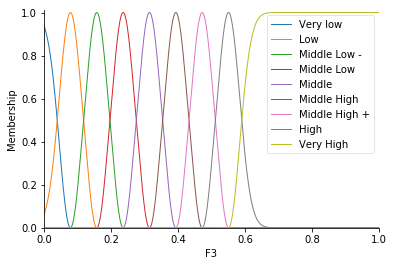

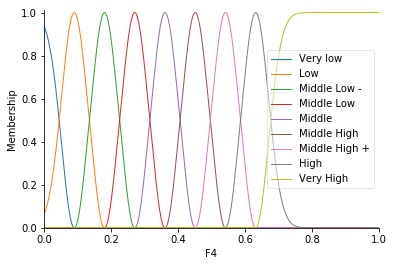

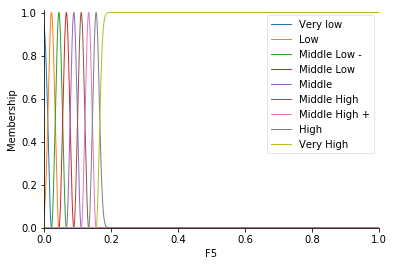

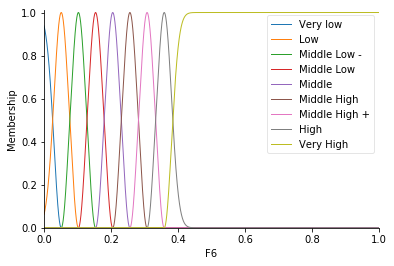

In [50]:
features = pickle.load(open(settings["backup_folder"] + "features.p", "rb"))

for x in features:
    x.view()

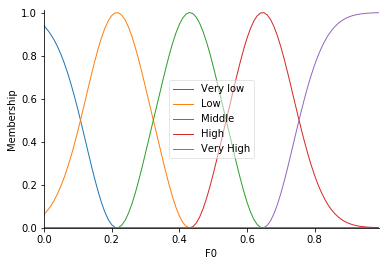

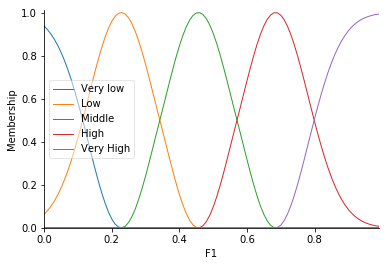

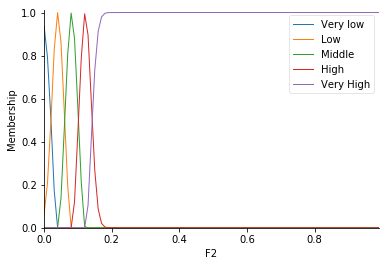

In [10]:
features = pickle.load(open(settings["backup_folder"] + "features.p", "rb"))

for x in features:
    x.view()

## Training Set

In [6]:
if generalSettings.mode == 2 or generalSettings.mode == 4:
    valueTest = ValueTest(settings, settings.s_function_width, True)

##### Training Set | No Optymalization

-----------------------------------------------------------------------------------
Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]
F-Score: [1. 1.]
Support: [57 15]
-----------------------------------------------------------------------------------
Center Point: 0.5
Time: 1.8739569187164307
-----------------------------------------------------------------------------------


,F4,F2,F1,F6,F0,F5,F3,Decision,Decision Fuzzy,Predicted Value
5,1,0.363636,0,0.0735294,0,0.0872483,0.111111,One,One,0.228169
55,1,0.590909,0.95122,0.0441176,0,0.041387,0.666667,One,One,0.229117
8,0,0.454545,0.097561,0.0882353,1,0.244966,0.0555556,One,One,0.231547
18,0,0.5,0,0.0735294,1,0.0559284,1,One,One,0.235558
0,1,0.113636,0.170732,0.705882,0,0.0503356,0.722222,One,One,0.24537
75,0.5,0.75,0.780488,0.0882353,1,0.403803,0.666667,One,One,0.25663
26,1,0.340909,0.219512,0.632353,1,0.0268456,0.5,One,One,0.261561
73,0,0.272727,0.878049,0.0735294,1,0.0659955,0,One,One,0.266546
33,0,0.295455,0.219512,0.411765,1,0.187919,0,One,One,0.266546
59,0.5,0.931818,0.292683,0,0,0.0346756,0.111111,One,One,0.266546


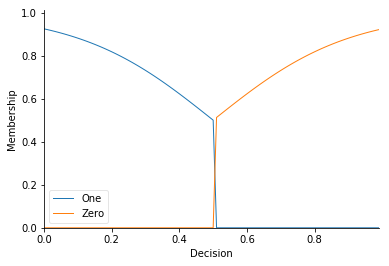

In [7]:
# if generalSettings.mode == 2 or generalSettings.mode == 4:
valueTest.noOptymalizationWorker(settings)

##### Training Set | S Function Optymalization

In [12]:
# if generalSettings.mode == 2 or generalSettings.mode == 4:
#     optimizeBruteForce = OptimizeBruteForce(settings, settings.s_function_width)

In [13]:
# if generalSettings.mode == 2 or generalSettings.mode == 4:
#     s_function_center = optimizeBruteForce.sFunctionsWorker(settings, settings.constraints, settings.s_function_width)

##### Training Set | Threshold Optymalization

In [14]:
# if generalSettings.mode == 2 or generalSettings.mode == 4:
#     threshold = optimizeBruteForce.thresholdWorker(settings, s_function_center, settings.s_function_width)

## Test Set

##### Test Set | No Optymalization 

In [15]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest = ValueTest(settings, settings.s_function_width, False)
    valueTest.noOptymalizationWorker(settings)

##### Test Set | S Function Value

In [16]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest.sOptymalizationWorker(settings, s_function_center)

##### Test Set | Threshold Value

In [17]:
if generalSettings.mode == 3 or generalSettings.mode == 4:
    valueTest.thresholdWorker(settings, s_function_center, threshold)